In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [3]:
def get_dataframe(filename: str = 'accidents.pkl.gz', verbose: bool = False) -> pd.DataFrame:
    df = pd.read_pickle(filename)
    newdf = df.copy()
    for i in range(len(df.columns)):
        try:
            if df[df.columns[i]].min()<0:
                #cant be uint
                if df[df.columns[i]].max()<=127:
                    newdf[df.columns[i]] = df[df.columns[i]].astype('int8')
                elif df[df.columns[i]].max()>127 and df[df.columns[i]].max()<=32767:
                    newdf[df.columns[i]] = df[df.columns[i]].astype('int16')
                else:
                    newdf[df.columns[i]] = df[df.columns[i]].astype('int32')

            else:
                #can be uint
                if df[df.columns[i]].max()<=255:
                    newdf[df.columns[i]] = df[df.columns[i]].astype('uint8')
                elif df[df.columns[i]].max()>255 and df[df.columns[i]].max()<=65535:
                    newdf[df.columns[i]] = df[df.columns[i]].astype('uint16')
                else:
                    newdf[df.columns[i]] = df[df.columns[i]].astype('uint32')
        except:
            continue
    
    for i in range(len(df.columns)-1):
        if df[df.columns[i]].dtype == 'object':
            newdf[df.columns[i]] = df[df.columns[i]].astype('category')
    
    newdf['date'] = pd.to_datetime(df['p2a'])
    if verbose:
        print("orig_size="+str(round(sum(df.memory_usage(deep=True))/1048576,1))+"MB")
        print("new_size="+str(round(sum(newdf.memory_usage(deep=True))/1048576,1))+"MB")

    return newdf

In [4]:
#def plot_conditions(df: pd.DataFrame, fig_location: str = None,  show_figure: bool = False):
#4 regions, p18==0 vyhodit, prepisat na textovu reprezentaciu
#pivot table?   stacked format? x axis year



#p18
# neztížené                                             1
# mlha
# na počátku deště, slabý déšť, mrholení apod.
# déšť
# sněžení
# tvoří se námraza, náledí
# nárazový vítr (boční, vichřice apod.)                 7


In [12]:
def _repl3(x):
    arr = ['neztížené','mlha','na počátku deště','déšť','sněžení','náledí','nárazový vítr']
    return arr[x-1]

In [13]:
df = get_dataframe()

In [14]:
newdf = df.loc[df['region'].isin(["PHA","STC","JHM","KVK"]),['p36','p18','region','date']].loc[df['p18']!=0].loc[df['date'].dt.year<2021]
newdf['p36'] = newdf['p36'].apply(lambda x: x**0).astype('int8')
newdf['p18'] = newdf['p18'].apply(_repl3).astype('category')


In [8]:
# pd.pivot_table(df, columns="parametr",
# values="hodnota", index="mesto",
# aggfunc="mean")
# #>> parametr teplota vlhkost
# #>> mesto
# #>> Brno 17.8 85.0
#>> Praha 17.3 89.0

In [19]:
newdf.pivot_table(columns="p18",values='p36',index=['date','region'],aggfunc='sum')
newdf = newdf.pivot_table(columns="p18",values='p36',index=['date','region'],aggfunc='sum')

In [20]:
ser = newdf.groupby([pd.Grouper(level='region'),pd.Grouper(level='date',freq="M")]).sum().stack(level='p18')

In [24]:
new_graph = pd.DataFrame({ "Počet nehod" : ser
})

AssertionError: 

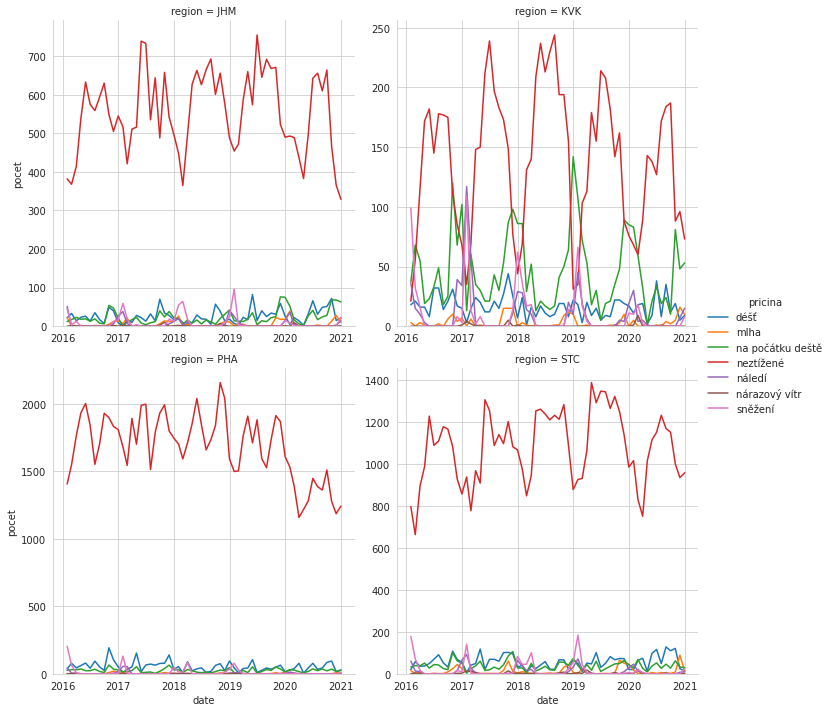

In [41]:
sns.set_style('whitegrid')
g = sns.relplot(x='date',y='Počet Nehod',col='region',hue='p18',data=new_graph,kind='line',col_wrap=2,facet_kws={'sharex':False,'sharey':False})
(g._legend.set_title('Príčina'))
(g.set(ylim=(0,None)))
